In [15]:
import numpy as np
from TDD2.TDD import Ini_TDD,Clear_TDD,set_index_order,get_tdd
from TDD2.TDD_Q import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD2.TDD_Q import reshape as reshape2
from TDD2.TN import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
from sympy import *
from sympy.parsing.sympy_parser import parse_expr
from TDD2.TDD import get_unique_table_num as gu1
from TDD2.BDD import get_unique_table_num as gu2
import matplotlib.pyplot as plt

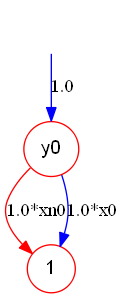

In [16]:
Ini_TDD(['x0','y0','x1','y1'])
A=['x0','y0','x1','y1','xn0']
[x0,y0,x1,y1,xn0]=symbols(A)
U=np.array([xn0,x0])
var=[Index('y0')]
ts1=Tensor(U,var)
tdd=ts1.tdd()
tdd.show()
# ts2=Tensor(U,var)

Max nodes: 2


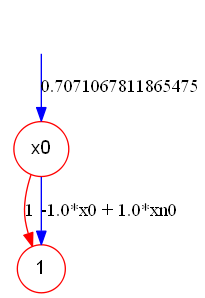

In [17]:
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
var2=[Index('x0'),Index('y0')]
ts2=Tensor(H,var2)
# ts2.tdd().show()
tn=TensorNetwork([ts1,ts2])
tdd=tn.cont()
# tdd.weight=[1/np.sqrt(2)]
tdd.show()
# Clear_TDD()

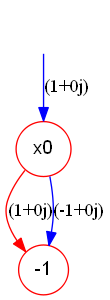

In [18]:
tdd.node.out_weight[1].show()

Max nodes: 6
6
88
46
0.20300769805908203


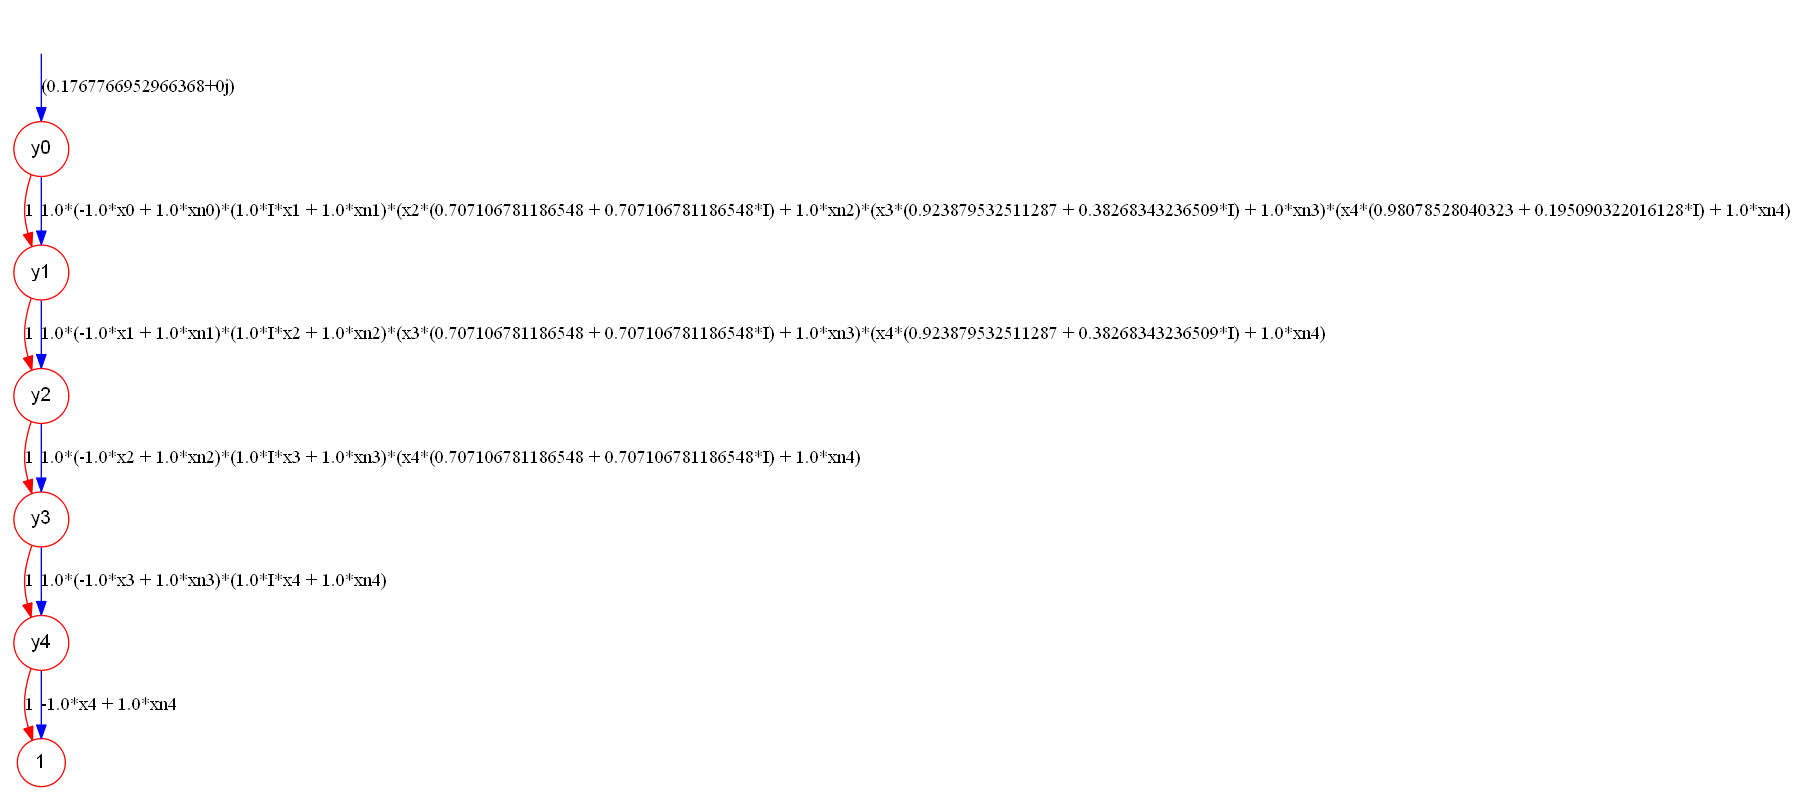

In [19]:
path='Benchmarks/'
n=5
t_start=time.time()
file_name='qft_'+str(n)+'.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,indices=cir_2_tn(cir)
Ini_TDD(indices)
for k in range(n):
    x_k='x'+str(k)
    xn_k='xn'+str(k)
    s=Symbol(x_k)
    ns=Symbol(xn_k)
    U=np.array([ns,s])
#     U=np.array([1,0])
    temp_ts=Tensor(U,[Index(x_k)])
    tn.tensors.insert(0,temp_ts)
tdd=tn.cont()
print(tdd.node_number())
print(gu1())
print(gu2())
print(time.time()-t_start)
tdd.show()

In [20]:
# Ini_TDD(['x0','y0','x1','y1'])
# x=symbols('x0')
# nx=symbols('xn0')
# U=np.array([[1,0,0,0],[0,1,0,0],[0,0,nx,x],[0,0,x,nx]])
# # U=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
# U=reshape2(U)
# # print(U)
# var=[Index('x0'),Index('y0'),Index('x1'),Index('y1')]
# ts1=Tensor(U,var)
# tdd=ts1.tdd()
# print(tdd.node_number())
# tdd.show()

Max nodes: 7


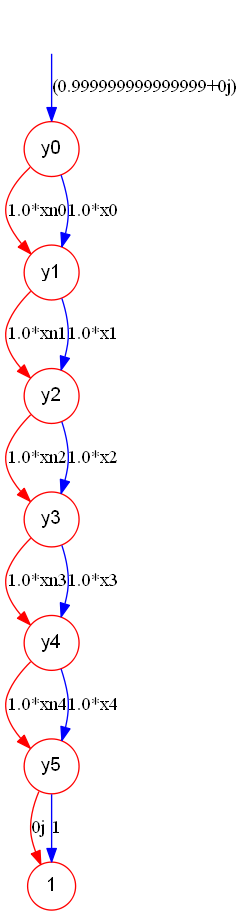

In [21]:
def veri_bv(n):

    syms=[]
    for k in range(n):
        syms.append(symbols('x'+str(k)))
        syms.append(symbols('xn'+str(k)))
        
    tn=TensorNetwork([])
    U=np.array([1,0])
    for k in range(n):
        var=[Index('x'+str(k))]
        ts=Tensor(U,var)
        tn.tensors.append(ts)
        
    U=np.array([0,1])
    var=[Index('x'+str(n))]
    ts=Tensor(U,var)
    tn.tensors.append(ts)
    
    H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
    for k in range(n+1):
        var=[Index('x'+str(k)),Index('x'+str(k)+'_1')]
        ts=Tensor(H,var)
        tn.tensors.append(ts)
    
    for k in range(n):
        U=np.array([[1,0,0,0],[0,1,0,0],[0,0,syms[2*k+1],syms[2*k]],[0,0,syms[2*k],syms[2*k+1]]])
        U=reshape2(U)
        var=[Index('x'+str(k)+'_1'),Index('x'+str(k)+'_2'),Index('x'+str(n)+'_'+str(k+1)),Index('x'+str(n)+'_'+str(k+2))]
        ts=Tensor(U,var)
        tn.tensors.append(ts)
    for k in range(n):
        var=[Index('x'+str(k)+'_2'),Index('y'+str(k))]
        ts=Tensor(H,var)
        tn.tensors.append(ts)

    var=[Index('x'+str(n)+'_'+str(n+1)),Index('y'+str(n))]
    ts=Tensor(H,var)
    tn.tensors.append(ts)
    
    var=[]
    for k in range(n):
        var.append('x'+str(k))
        var.append('x'+str(k)+'_1')
        var.append('x'+str(k)+'_2')
        var.append('y'+str(k))
    var.append('x'+str(n))
    
    for k in range(n+1):
        var.append('x'+str(n)+'_'+str(k+1))
    var.append('y'+str(n))
    Ini_TDD(var)
    
    tdd=tn.cont()
    return tdd

tdd=veri_bv(5)
tdd.show()

In [22]:
def toffoli(n):
    """The matrix of C^n(X)"""
    T=np.eye(2**(n+1))
    T[2**(n+1)-2,2**(n+1)-2]=0
    T[2**(n+1)-1,2**(n+1)-1]=0
    T[2**(n+1)-2,2**(n+1)-1]=1
    T[2**(n+1)-1,2**(n+1)-2]=1
    return T

Max nodes: 24


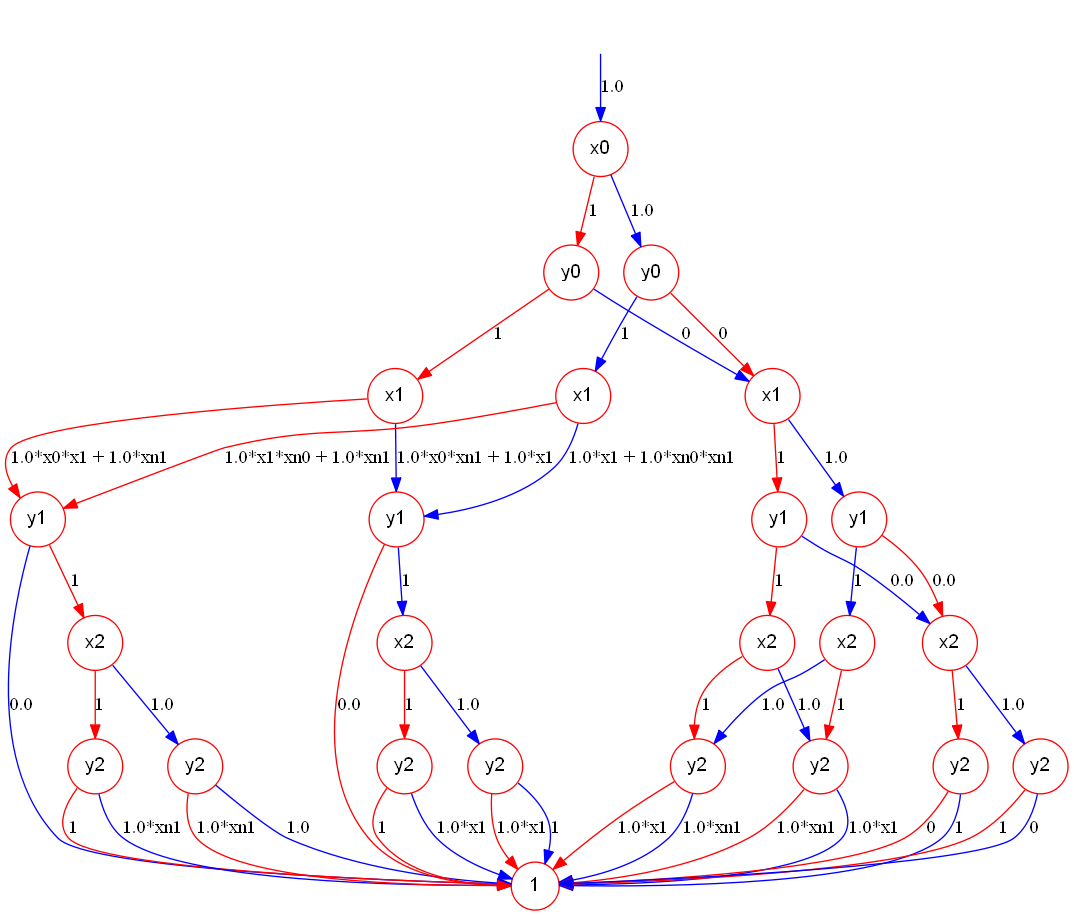

In [23]:
n=2
U=toffoli(n)
U=reshape2(U)
s0=symbols('x0')
s1=symbols('x1')
sn0=symbols('xn0')
sn1=symbols('xn1')
X0=np.array([[s0,sn0],[sn0,s0]])
X1=np.array([[s1,sn1],[sn1,s1]])

tn=TensorNetwork([])
var=[Index('x0'),Index('x0_1')]
ts=Tensor(X0,var)
tn.tensors.append(ts)
var=[Index('x1'),Index('x1_1')]
ts=Tensor(X1,var)
tn.tensors.append(ts)

var=[]
for k in range(n):
    var.append(Index('x'+str(k)+'_1'))
    var.append(Index('x'+str(k)+'_2'))
var.append(Index('x'+str(n)))
var.append(Index('y'+str(n)))
ts=Tensor(U,var)
tn.tensors.append(ts)

var=[Index('x0_2'),Index('y0')]
ts=Tensor(X0,var)
tn.tensors.append(ts)
var=[Index('x1_2'),Index('y1')]
ts=Tensor(X1,var)
tn.tensors.append(ts)


var=[]
for k in range(n+1):
    var.append('x'+str(k))
    var.append('x'+str(k)+'_1')
    var.append('x'+str(k)+'_2')
    var.append('y'+str(k))
    
Ini_TDD(var)
    
tdd=tn.cont()

tdd.show()

In [24]:
path='Benchmarks/'
x=[]
y=[]
z=[]
for n in range(2,31,1):
    t1=time.time()
    file_name='qft_'+str(n)+'.qasm'
    cir=QuantumCircuit.from_qasm_file(path+file_name)
    tn,indices=cir_2_tn(cir)
    for k in range(n):
        x_k='x'+str(k)
        xn_k='xn'+str(k)
        s=Symbol(x_k)
        ns=Symbol(xn_k)
        U=np.array([ns,s])
    #     U=np.array([1,0])
        temp_ts=Tensor(U,[Index(x_k)])
        tn.tensors.insert(0,temp_ts)
    Ini_TDD(indices)
    tdd=tn.cont()
    t=time.time()-t1
    print(n,t)
    print(gu1())
    print(gu2())
    x.append(n)
    y.append(t)
    z.append(gu1()+gu2())

Max nodes: 3
2 0.06796836853027344
20
9
Max nodes: 4
3 0.06899023056030273
37
17
Max nodes: 5
4 0.10100173950195312
60
29
Max nodes: 6
5 0.16500258445739746
88
46
Max nodes: 7
6 0.37098026275634766
122
69
Max nodes: 8
7 0.4240000247955322
163
99
Max nodes: 9
8 0.6599686145782471
212
137
Max nodes: 10
9 1.0010261535644531
270
184
Max nodes: 11
10 1.4820079803466797
338
241
Max nodes: 12
11 1.8129463195800781
417
309
Max nodes: 13
12 2.4709978103637695
508
389
Max nodes: 14
13 3.662046194076538
612
482
Max nodes: 15
14 4.867954969406128
730
589
Max nodes: 16
15 6.124053716659546
863
711
Max nodes: 17
16 7.837016344070435
1012
849
Max nodes: 18
17 9.657984733581543
1178
1004
Max nodes: 19
18 11.960998773574829
1362
1177
Max nodes: 20
19 15.163248062133789
1565
1369
Max nodes: 21
20 17.634926080703735
1788
1581
Max nodes: 22
21 21.170071125030518
2032
1814
Max nodes: 23
22 25.48800492286682
2298
2069
Max nodes: 24
23 29.414969444274902
2586
2325
Max nodes: 25
24 34.16500759124756
2893
2581

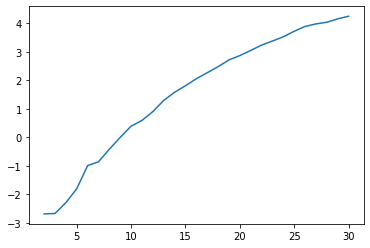

In [31]:
y=[log(k) for k in y]
plt.plot(x,y)

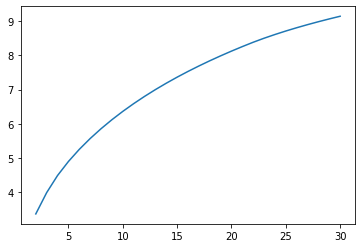

In [32]:
z=[log(k) for k in z]
plt.plot(x,z)